## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 



In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
#sns.set_style("darkgrid")
#mpl.rcParams['figure.figsize'] = (15,8) 
import plotly.graph_objects as go 
import plotly.express as px 
from dash import Dash, html, dcc
import sklearn

### Step 2: <span style="color:green">Load data</span> 

In [2]:
#load data 
S_PFirms=pd.read_csv('S_PFirms.csv')
esg_ratings=pd.read_csv('esg_ratings.csv')
SPfin_data=pd.read_csv('SPfinancial_datas.csv')

S_PFirms.head(5)

Ticker   Securities       Sector                  Industry  \
0    MMM           3M  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith  Industrials         Building Products   
2    ABT       Abbott  Health Care     Health Care Equipment   
3   ABBV       AbbVie  Health Care           Pharmaceuticals   
4   ABMD      Abiomed  Health Care     Health Care Equipment   

               Headquarter  
0    Saint Paul, Minnesota  
1     Milwaukee, Wisconsin  
2  North Chicago, Illinois  
3  North Chicago, Illinois  
4   Danvers, Massachusetts

In [3]:
esg_ratings.head(5)


Ticker  Total ESG Score  Environment  Social  Governance  Controversy Score
0    MMM               35           13      14           8                  3
1    AOS               25            7      12           6                  2
2    ABT               26            3      14           9                  3
3   ABBV               28            1      17          10                  3
4    ACN                9            0       4           5                  2

In [4]:

#check data
SPfin_data.head(5)

Ticker Insider_Share_Perct Institutions_Share_Perct Profit Margin  \
0    MMM               0.12%                   68.48%        16.75%   
1    AOS               0.96%                   96.48%        13.76%   
2    ABT               0.74%                   75.39%        16.42%   
3   ABBV               0.14%                   68.99%        20.54%   
4   ABMD               2.02%                   94.16%        13.26%   

  Operating Margin Return on Assets Return on Equity Revenue Gross Profit  \
0           22.03%           10.31%           42.28%  35.36B       16.58B   
1           17.21%           11.47%           26.47%   3.54B        1.31B   
2           21.40%            7.80%           20.49%  43.07B       25.01B   
3           34.75%            8.22%           80.95%   56.2B       38.88B   
4           25.32%           10.51%            9.88%      1B      685.62M   

    EBITDA                   Company_name  
0     9.7B               3M Company (MMM)  
1   686.8M  A. O. Smith Corporation (AOS)  
2   12.76B      Abbott Laboratories (ABT)  
3   28.05B             AbbVie Inc. (ABBV)  
4  280.84M           Abiomed, Inc. (ABMD)

In [5]:
SPfin_data.columns

Index(['Ticker', 'Insider_Share_Perct', 'Institutions_Share_Perct',
       'Profit Margin', 'Operating Margin', 'Return on Assets',
       'Return on Equity', 'Revenue', 'Gross Profit', 'EBITDA',
       'Company_name'],
      dtype='object')

In [6]:
#Rename columns
new_cols = ['Ticker', 'Insider_Share(%)', 'Institutions_Share(%)',
       'Profit Margin(%)', 'Operating Margin(%)', 'Return on Assets(%)',
       'Return on Equity (%)', 'Revenue($Billions)', 'Gross Profit($Billions)', 'EBITDA($Billions)',
       'Company_name']
new_names_map = {SPfin_data.columns[i]:new_cols[i] for i in range(len(new_cols))}

SPfin_data.rename(new_names_map, axis=1, inplace=True)
SPfin_data.head()

Ticker Insider_Share(%) Institutions_Share(%) Profit Margin(%)  \
0    MMM            0.12%                68.48%           16.75%   
1    AOS            0.96%                96.48%           13.76%   
2    ABT            0.74%                75.39%           16.42%   
3   ABBV            0.14%                68.99%           20.54%   
4   ABMD            2.02%                94.16%           13.26%   

  Operating Margin(%) Return on Assets(%) Return on Equity (%)  \
0              22.03%              10.31%               42.28%   
1              17.21%              11.47%               26.47%   
2              21.40%               7.80%               20.49%   
3              34.75%               8.22%               80.95%   
4              25.32%              10.51%                9.88%   

  Revenue($Billions) Gross Profit($Billions) EBITDA($Billions)  \
0             35.36B                  16.58B              9.7B   
1              3.54B                   1.31B            686.8M   
2             43.07B                  25.01B            12.76B   
3              56.2B                  38.88B            28.05B   
4                 1B                 685.62M           280.84M   

                    Company_name  
0               3M Company (MMM)  
1  A. O. Smith Corporation (AOS)  
2      Abbott Laboratories (ABT)  
3             AbbVie Inc. (ABBV)  
4           Abiomed, Inc. (ABMD)

In [7]:
# merge data into one data frame, merge S&P firm information with their esg ratings
SPEsg_Rate = pd.merge(S_PFirms, esg_ratings, how="outer", on=["Ticker"])
SPEsg_Rate.head()


Ticker   Securities       Sector                  Industry  \
0    MMM           3M  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith  Industrials         Building Products   
2    ABT       Abbott  Health Care     Health Care Equipment   
3   ABBV       AbbVie  Health Care           Pharmaceuticals   
4   ABMD      Abiomed  Health Care     Health Care Equipment   

               Headquarter  Total ESG Score  Environment  Social  Governance  \
0    Saint Paul, Minnesota             35.0         13.0    14.0         8.0   
1     Milwaukee, Wisconsin             25.0          7.0    12.0         6.0   
2  North Chicago, Illinois             26.0          3.0    14.0         9.0   
3  North Chicago, Illinois             28.0          1.0    17.0        10.0   
4   Danvers, Massachusetts              NaN          NaN     NaN         NaN   

   Controversy Score  
0                3.0  
1                2.0  
2                3.0  
3                3.0  
4                NaN

In [8]:
#Merge S&P ESG ratings with their financial data
SPEsg_Fin = pd.merge(SPEsg_Rate, SPfin_data, how="outer", on=["Ticker"])
SPEsg_Fin.head()

Ticker   Securities       Sector                  Industry  \
0    MMM           3M  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith  Industrials         Building Products   
2    ABT       Abbott  Health Care     Health Care Equipment   
3   ABBV       AbbVie  Health Care           Pharmaceuticals   
4   ABMD      Abiomed  Health Care     Health Care Equipment   

               Headquarter  Total ESG Score  Environment  Social  Governance  \
0    Saint Paul, Minnesota             35.0         13.0    14.0         8.0   
1     Milwaukee, Wisconsin             25.0          7.0    12.0         6.0   
2  North Chicago, Illinois             26.0          3.0    14.0         9.0   
3  North Chicago, Illinois             28.0          1.0    17.0        10.0   
4   Danvers, Massachusetts              NaN          NaN     NaN         NaN   

   Controversy Score Insider_Share(%) Institutions_Share(%) Profit Margin(%)  \
0                3.0            0.12%                68.48%           16.75%   
1                2.0            0.96%                96.48%           13.76%   
2                3.0            0.74%                75.39%           16.42%   
3                3.0            0.14%                68.99%           20.54%   
4                NaN            2.02%                94.16%           13.26%   

  Operating Margin(%) Return on Assets(%) Return on Equity (%)  \
0              22.03%              10.31%               42.28%   
1              17.21%              11.47%               26.47%   
2              21.40%               7.80%               20.49%   
3              34.75%               8.22%               80.95%   
4              25.32%              10.51%                9.88%   

  Revenue($Billions) Gross Profit($Billions) EBITDA($Billions)  \
0             35.36B                  16.58B              9.7B   
1              3.54B                   1.31B            686.8M   
2             43.07B                  25.01B            12.76B   
3              56.2B                  38.88B            28.05B   
4                 1B                 685.62M           280.84M   

                    Company_name  
0               3M Company (MMM)  
1  A. O. Smith Corporation (AOS)  
2      Abbott Laboratories (ABT)  
3             AbbVie Inc. (ABBV)  
4           Abiomed, Inc. (ABMD)

### Step 3: <span style="color:green">Data wrangling</span> 

In [9]:
#Reorder column arrangement so Company name moves forward
SPEsg_Fin = SPEsg_Fin[['Ticker', 'Securities', 'Company_name','Sector', 'Industry', 'Headquarter',
       'Total ESG Score', 'Environment', 'Social', 'Governance',
       'Controversy Score', 'Insider_Share(%)', 'Institutions_Share(%)',
       'Profit Margin(%)', 'Operating Margin(%)', 'Return on Assets(%)',
       'Return on Equity (%)', 'Revenue($Billions)', 'Gross Profit($Billions)',
       'EBITDA($Billions)']] # rearrange column here
SPEsg_Fin.tail()

Ticker     Securities                                       Company_name  \
501   ZBRA          Zebra              Zebra Technologies Corporation (ZBRA)   
502    ZBH  Zimmer Biomet                 Zimmer Biomet Holdings, Inc. (ZBH)   
503   ZION  Zions Bancorp  Zions Bancorporation, National Association (ZION)   
504    ZTS         Zoetis                                  Zoetis Inc. (ZTS)   
505   INFO            NaN                             IHS Markit Ltd. (INFO)   

                     Sector                            Industry  \
501  Information Technology  Electronic Equipment & Instruments   
502             Health Care               Health Care Equipment   
503              Financials                      Regional Banks   
504             Health Care                     Pharmaceuticals   
505                     NaN                                 NaN   

                Headquarter  Total ESG Score  Environment  Social  Governance  \
501  Lincolnshire, Illinois              NaN          NaN     NaN         NaN   
502         Warsaw, Indiana             28.0          5.0    14.0        10.0   
503    Salt Lake City, Utah              NaN          NaN     NaN         NaN   
504  Parsippany, New Jersey             18.0          1.0     8.0         9.0   
505                     NaN              NaN          NaN     NaN         NaN   

     Controversy Score Insider_Share(%) Institutions_Share(%)  \
501                NaN            0.50%                87.85%   
502                2.0            5.51%                91.97%   
503                NaN            1.57%                85.58%   
504                1.0            0.23%                92.83%   
505                NaN            6.92%                91.18%   

    Profit Margin(%) Operating Margin(%) Return on Assets(%)  \
501           15.45%              18.36%              11.30%   
502            5.12%              16.52%               3.38%   
503           36.89%              48.91%               1.44%   
504           26.02%              36.00%              12.49%   
505           13.53%              24.89%               4.36%   

    Return on Equity (%) Revenue($Billions) Gross Profit($Billions)  \
501               35.60%              5.47B                      2B   
502                3.23%              7.84B                   5.54B   
503               15.54%              3.25B                   2.38B   
504               47.76%              7.62B                   4.64B   
505                7.07%              4.59B                    2.7B   

    EBITDA($Billions)  
501             1.18B  
502             2.36B  
503          ('N/A',)  
504             3.14B  
505             1.74B

In [10]:
#Remove ('N/A',), % from columns
def data_perctto_float(data):
    if type(data) == float or type(data) == int:
        return data
    if '%' in data:
        if len(data) > 1:
            return float(data.replace('%', '')) * 1
        return 1.0
    if 'N/A' in data:
        return None
    
SPEsg_Fin['Insider_Share(%)']=SPEsg_Fin['Insider_Share(%)'].apply(data_perctto_float)
SPEsg_Fin['Institutions_Share(%)']=SPEsg_Fin['Institutions_Share(%)'].apply(data_perctto_float)
SPEsg_Fin['Operating Margin(%)']=SPEsg_Fin['Operating Margin(%)'].apply(data_perctto_float)
SPEsg_Fin['Profit Margin(%)']=SPEsg_Fin['Profit Margin(%)'].apply(data_perctto_float)
SPEsg_Fin['Return on Equity (%)']=SPEsg_Fin['Return on Equity (%)'].apply(data_perctto_float)
SPEsg_Fin['Return on Assets(%)']=SPEsg_Fin['Return on Assets(%)'].apply(data_perctto_float)

#Remove ticker from company name
SPEsg_Fin['Company_name']=SPEsg_Fin['Company_name'].str.split("(").str[0]
SPEsg_Fin

Ticker     Securities                                 Company_name  \
0      MMM             3M                                  3M Company    
1      AOS    A. O. Smith                     A. O. Smith Corporation    
2      ABT         Abbott                         Abbott Laboratories    
3     ABBV         AbbVie                                 AbbVie Inc.    
4     ABMD        Abiomed                               Abiomed, Inc.    
..     ...            ...                                          ...   
501   ZBRA          Zebra              Zebra Technologies Corporation    
502    ZBH  Zimmer Biomet                Zimmer Biomet Holdings, Inc.    
503   ZION  Zions Bancorp  Zions Bancorporation, National Association    
504    ZTS         Zoetis                                 Zoetis Inc.    
505   INFO            NaN                             IHS Markit Ltd.    

                     Sector                            Industry  \
0               Industrials            Industrial Conglomerates   
1               Industrials                   Building Products   
2               Health Care               Health Care Equipment   
3               Health Care                     Pharmaceuticals   
4               Health Care               Health Care Equipment   
..                      ...                                 ...   
501  Information Technology  Electronic Equipment & Instruments   
502             Health Care               Health Care Equipment   
503              Financials                      Regional Banks   
504             Health Care                     Pharmaceuticals   
505                     NaN                                 NaN   

                 Headquarter  Total ESG Score  Environment  Social  \
0      Saint Paul, Minnesota             35.0         13.0    14.0   
1       Milwaukee, Wisconsin             25.0          7.0    12.0   
2    North Chicago, Illinois             26.0          3.0    14.0   
3    North Chicago, Illinois             28.0          1.0    17.0   
4     Danvers, Massachusetts              NaN          NaN     NaN   
..                       ...              ...          ...     ...   
501   Lincolnshire, Illinois              NaN          NaN     NaN   
502          Warsaw, Indiana             28.0          5.0    14.0   
503     Salt Lake City, Utah              NaN          NaN     NaN   
504   Parsippany, New Jersey             18.0          1.0     8.0   
505                      NaN              NaN          NaN     NaN   

     Governance  Controversy Score  Insider_Share(%)  Institutions_Share(%)  \
0           8.0                3.0              0.12                  68.48   
1           6.0                2.0              0.96                  96.48   
2           9.0                3.0              0.74                  75.39   
3          10.0                3.0              0.14                  68.99   
4           NaN                NaN              2.02                  94.16   
..          ...                ...               ...                    ...   
501         NaN                NaN              0.50                  87.85   
502        10.0                2.0              5.51                  91.97   
503         NaN                NaN              1.57                  85.58   
504         9.0                1.0              0.23                  92.83   
505         NaN                NaN              6.92                  91.18   

     Profit Margin(%)  Operating Margin(%)  Return on Assets(%)  \
0               16.75                22.03                10.31   
1               13.76                17.21                11.47   
2               16.42                21.40                 7.80   
3               20.54                34.75                 8.22   
4               13.26                25.32                10.51   
..                ...                  ...                  ...   
501             15.45                18.36         

In [11]:
#Replace B and M in columns with digits 
def data_to_float(data):
    if type(data) == float or type(data) == int:
        return data
    if 'N/A' in data:
        return None
    if 'M' in data:
        if len(data) > 1:
            return float(data.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in data:
        return float(data.replace('B', '')) * 1000000000
    return 1000000000.0
    

SPEsg_Fin['Revenue($Billions)']=SPEsg_Fin['Revenue($Billions)'].apply(data_to_float) 
SPEsg_Fin['Gross Profit($Billions)']=SPEsg_Fin['Gross Profit($Billions)'].apply(data_to_float)
SPEsg_Fin['EBITDA($Billions)']=SPEsg_Fin['EBITDA($Billions)'].apply(data_to_float)

#Divide Revenue,Gross Profit and EBITDA by 1,000,000,000 for ease of visualization
SPEsg_Fin['Revenue($Billions)'] = (SPEsg_Fin['Revenue($Billions)']/1000000000).apply(lambda data: '{:,.2f}'.format(data))
SPEsg_Fin['Gross Profit($Billions)'] = (SPEsg_Fin['Gross Profit($Billions)']/1000000000).apply(lambda data: '{:,.2f}'.format(data))
SPEsg_Fin['EBITDA($Billions)'] = (SPEsg_Fin['EBITDA($Billions)']/1000000000).apply(lambda data: '{:,.2f}'.format(data))

SPEsg_Fin

Ticker     Securities                                 Company_name  \
0      MMM             3M                                  3M Company    
1      AOS    A. O. Smith                     A. O. Smith Corporation    
2      ABT         Abbott                         Abbott Laboratories    
3     ABBV         AbbVie                                 AbbVie Inc.    
4     ABMD        Abiomed                               Abiomed, Inc.    
..     ...            ...                                          ...   
501   ZBRA          Zebra              Zebra Technologies Corporation    
502    ZBH  Zimmer Biomet                Zimmer Biomet Holdings, Inc.    
503   ZION  Zions Bancorp  Zions Bancorporation, National Association    
504    ZTS         Zoetis                                 Zoetis Inc.    
505   INFO            NaN                             IHS Markit Ltd.    

                     Sector                            Industry  \
0               Industrials            Industrial Conglomerates   
1               Industrials                   Building Products   
2               Health Care               Health Care Equipment   
3               Health Care                     Pharmaceuticals   
4               Health Care               Health Care Equipment   
..                      ...                                 ...   
501  Information Technology  Electronic Equipment & Instruments   
502             Health Care               Health Care Equipment   
503              Financials                      Regional Banks   
504             Health Care                     Pharmaceuticals   
505                     NaN                                 NaN   

                 Headquarter  Total ESG Score  Environment  Social  \
0      Saint Paul, Minnesota             35.0         13.0    14.0   
1       Milwaukee, Wisconsin             25.0          7.0    12.0   
2    North Chicago, Illinois             26.0          3.0    14.0   
3    North Chicago, Illinois             28.0          1.0    17.0   
4     Danvers, Massachusetts              NaN          NaN     NaN   
..                       ...              ...          ...     ...   
501   Lincolnshire, Illinois              NaN          NaN     NaN   
502          Warsaw, Indiana             28.0          5.0    14.0   
503     Salt Lake City, Utah              NaN          NaN     NaN   
504   Parsippany, New Jersey             18.0          1.0     8.0   
505                      NaN              NaN          NaN     NaN   

     Governance  Controversy Score  Insider_Share(%)  Institutions_Share(%)  \
0           8.0                3.0              0.12                  68.48   
1           6.0                2.0              0.96                  96.48   
2           9.0                3.0              0.74                  75.39   
3          10.0                3.0              0.14                  68.99   
4           NaN                NaN              2.02                  94.16   
..          ...                ...               ...                    ...   
501         NaN                NaN              0.50                  87.85   
502        10.0                2.0              5.51                  91.97   
503         NaN                NaN              1.57                  85.58   
504         9.0                1.0              0.23                  92.83   
505         NaN                NaN              6.92                  91.18   

     Profit Margin(%)  Operating Margin(%)  Return on Assets(%)  \
0               16.75                22.03                10.31   
1               13.76                17.21                11.47   
2               16.42                21.40                 7.80   
3               20.54                34.75                 8.22   
4               13.26                25.32                10.51   
..                ...                  ...                  ...   
501             15.45                18.36         

In [12]:
#check datatype
SPEsg_Fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ticker                   506 non-null    object 
 1   Securities               505 non-null    object 
 2   Company_name             504 non-null    object 
 3   Sector                   505 non-null    object 
 4   Industry                 505 non-null    object 
 5   Headquarter              505 non-null    object 
 6   Total ESG Score          443 non-null    float64
 7   Environment              443 non-null    float64
 8   Social                   443 non-null    float64
 9   Governance               443 non-null    float64
 10  Controversy Score        443 non-null    float64
 11  Insider_Share(%)         502 non-null    float64
 12  Institutions_Share(%)    502 non-null    float64
 13  Profit Margin(%)         502 non-null    float64
 14  Operating Margin(%)      5

In [13]:
#Convert datatypes with numbers to appropraite data types
SPEsg_Fin[["Revenue($Billions)", "Gross Profit($Billions)","EBITDA($Billions)"]] = SPEsg_Fin[["Revenue($Billions)", "Gross Profit($Billions)","EBITDA($Billions)"]].apply(pd.to_numeric,errors='coerce')
SPEsg_Fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ticker                   506 non-null    object 
 1   Securities               505 non-null    object 
 2   Company_name             504 non-null    object 
 3   Sector                   505 non-null    object 
 4   Industry                 505 non-null    object 
 5   Headquarter              505 non-null    object 
 6   Total ESG Score          443 non-null    float64
 7   Environment              443 non-null    float64
 8   Social                   443 non-null    float64
 9   Governance               443 non-null    float64
 10  Controversy Score        443 non-null    float64
 11  Insider_Share(%)         502 non-null    float64
 12  Institutions_Share(%)    502 non-null    float64
 13  Profit Margin(%)         502 non-null    float64
 14  Operating Margin(%)      5

In [14]:
#Drop columns not of interest
SPEsg_Fin = SPEsg_Fin.drop(['Operating Margin(%)','Insider_Share(%)','Return on Equity (%)','Return on Assets(%)','EBITDA($Billions)','Gross Profit($Billions)', 'Revenue($Billions)'],axis=1)#



In [15]:
# Get a column that categorizes ESG scores to ESG Risk ratings
SPEsg_Fin["ESG Rating"]=SPEsg_Fin["Total ESG Score"]

def data_to_ESG(data):

    if data <= 10:
        return "0-10"
    elif data >10 and data <= 20:
        return "10-20"
    elif data >20 and data <=30:
        return "20-30"
    elif data >30 and data <=40:
        return "30-40"
    else: # data >40:
        return "40+"

SPEsg_Fin["ESG Rating"]= SPEsg_Fin["ESG Rating"].apply(data_to_ESG)
    
SPEsg_Fin
SPEsg_Fin.to_csv('SPEsg_Findata.csv', index=False)

In [16]:
##Number of S&P500Companies with and without ESG ratings
print(SPEsg_Fin['Total ESG Score'].notnull().sum())
print(SPEsg_Fin['Total ESG Score'].isnull().sum())


443
63


In [17]:
# percent of null values in columns under observation
SPEsg_Fin.isnull().sum()/ SPEsg_Fin.shape[1]


Ticker                   0.000000
Securities               0.071429
Company_name             0.142857
Sector                   0.071429
Industry                 0.071429
Headquarter              0.071429
Total ESG Score          4.500000
Environment              4.500000
Social                   4.500000
Governance               4.500000
Controversy Score        4.500000
Institutions_Share(%)    0.285714
Profit Margin(%)         0.285714
ESG Rating               0.000000
dtype: float64

In [18]:
#Check for duplicates
np.sum(SPEsg_Fin.duplicated())

0

In [19]:
SPEsg_Finclean=SPEsg_Fin.dropna().round()

In [20]:
# Number of non-null values in columns under observation
SPEsg_Finclean.notnull().sum()


Ticker                   443
Securities               443
Company_name             443
Sector                   443
Industry                 443
Headquarter              443
Total ESG Score          443
Environment              443
Social                   443
Governance               443
Controversy Score        443
Institutions_Share(%)    443
Profit Margin(%)         443
ESG Rating               443
dtype: int64

In [21]:
#Save data
SPEsg_Finclean.to_csv('SPEsg_Fincleandata.csv', index=False)

### Step 4: <span style="color:green">Data Exploration</span> 

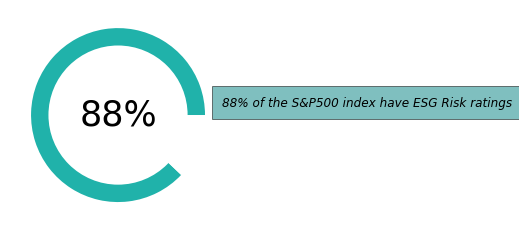

In [22]:
#Percentage of S&P500Companies with and without ESG ratings
ESG_firms = {'ESG_Status':['ESG Rating','NO ESG Rating'], 
          'Number of firms':[444, 61]}
df = pd.DataFrame(ESG_firms)
df.to_csv('ESG_firms.csv')

ax=df['Number of firms'].plot.pie(textprops={'color':"white"},pctdistance=1.18,autopct='%.0f%%',fontsize=14,figsize=(4,4),colors=['lightseagreen','white'], labels=None)
ax.set_ylabel('')
plt.legend('',frameon=False)
ax.text(0, 0, f"88%", ha='center', va='center', fontsize=35)
ax.text(1.2, 0.1, '88% of the S&P500 index have ESG Risk ratings', style='italic', bbox={
        'facecolor': 'teal', 'alpha': 0.5, 'pad': 10}, fontsize=12)
centre_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


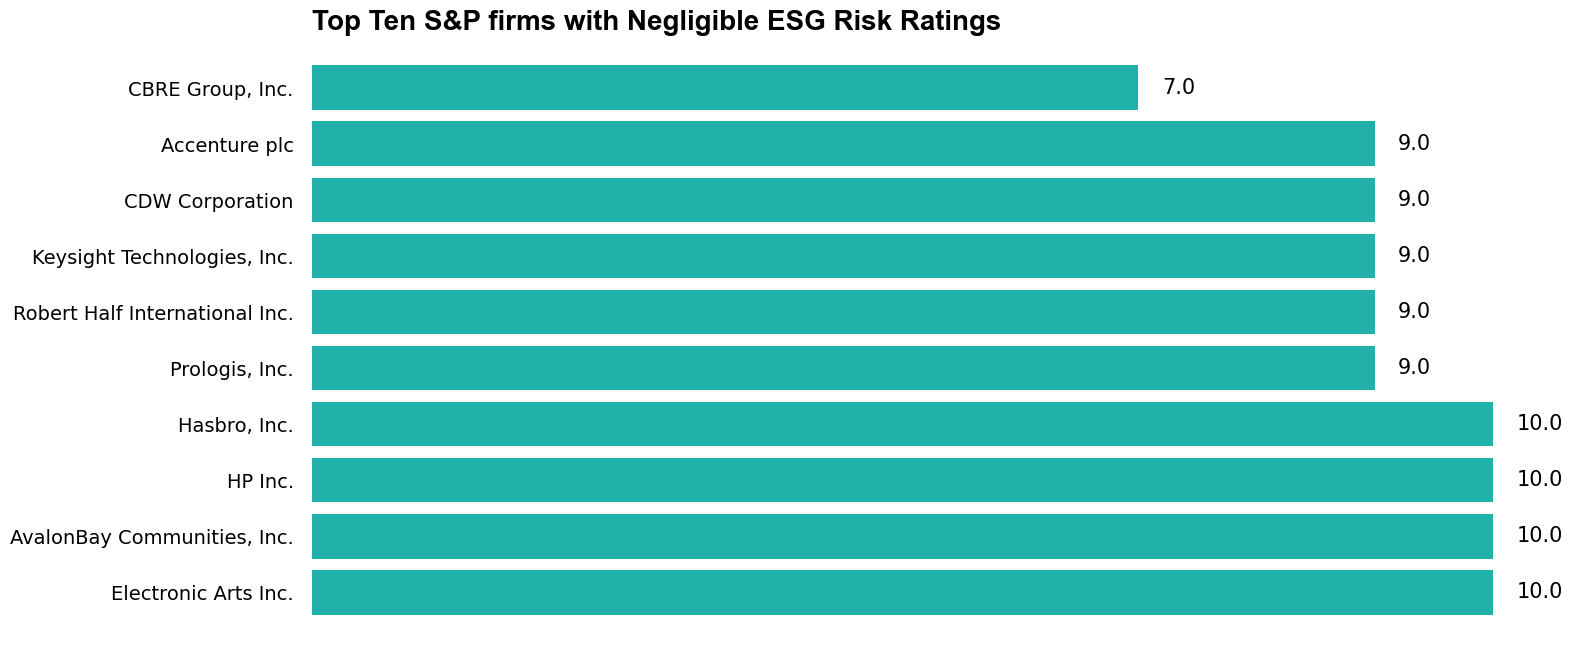

In [23]:
#Visualize Top S&P Firms with low ESG Risk ratings
data= SPEsg_Finclean[['Company_name','Total ESG Score']]
data_esg=data.sort_values('Total ESG Score', ascending=True).head(10)

x = data_esg['Company_name'].head(10) 
y = data_esg['Total ESG Score'].sort_values(axis=0, ascending=True).head(10)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 8),dpi=100)
 
# Horizontal Bar Plot
ax.barh(x, y, color='lightseagreen')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
 
# Add x, y gridlines
'''ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)'''
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars; Iterrating over the bars one-by-one        
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 15,# fontweight ='bold',
             color ='black')
ax.axes.get_xaxis().set_visible(False)
plt.tick_params(labelsize=14)

#ax.set_ylabel('Overall ESG Ratings',fontsize=15)
ax.set_title('Top Ten S&P firms with Negligible ESG Risk Ratings',{'fontname':'Arial','fontsize': 20,
        'color': 'black','weight' : 'bold'}, loc ='left')
 
        # Create annotation

'''# Add Text watermark
fig.text(0.9, 0.15, 'ESG Ratingd', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)'''

 
 
# Show Plot
plt.show()


In [24]:
SPEsg_Finclean.sort_values('Total ESG Score', ascending=True).head(10)


Ticker             Securities                     Company_name  \
93    CBRE                   CBRE                CBRE Group, Inc.    
5      ACN              Accenture                   Accenture plc    
94     CDW                    CDW                 CDW Corporation    
272   KEYS               Keysight     Keysight Technologies, Inc.    
405    RHI            Robert Half  Robert Half International Inc.    
385    PLD               Prologis                  Prologis, Inc.    
227    HAS                 Hasbro                    Hasbro, Inc.    
241    HPQ                     HP                         HP Inc.    
55     AVB  AvalonBay Communities     AvalonBay Communities, Inc.    
171     EA        Electronic Arts            Electronic Arts Inc.    

                     Sector                                    Industry  \
93              Real Estate                        Real Estate Services   
5    Information Technology              IT Consulting & Other Services   
94   Information Technology                     Technology Distributors   
272  Information Technology          Electronic Equipment & Instruments   
405             Industrials        Human Resource & Employment Services   
385             Real Estate                            Industrial REITs   
227  Consumer Discretionary                            Leisure Products   
241  Information Technology  Technology Hardware, Storage & Peripherals   
55              Real Estate                           Residential REITs   
171  Communication Services              Interactive Home Entertainment   

                   Headquarter  Total ESG Score  Environment  Social  \
93               Dallas, Texas              7.0          1.0     2.0   
5              Dublin, Ireland              9.0          0.0     4.0   
94      Lincolnshire, Illinois              9.0          2.0     3.0   
272     Santa Rosa, California              9.0          2.0     2.0   
405     Menlo Park, California              9.0          0.0     6.0   
385  San Francisco, California              9.0          2.0     2.0   
227    Pawtucket, Rhode Island             10.0          0.0     5.0   
241      Palo Alto, California             10.0          0.0     5.0   
55      Arlington, Virginia[3]             10.0          3.0     3.0   
171   Redwood City, California             10.0          0.0     6.0   

     Governance  Controversy Score  Institutions_Share(%)  Profit Margin(%)  \
93          3.0                1.0                   99.0               6.0   
5           5.0                2.0                   75.0              12.0   
94          3.0                0.0                   95.0               5.0   
272         5.0                1.0                   90.0              18.0   
405         4.0                1.0                   91.0               9.0   
385         4.0                1.0                   96.0              40.0   
227         5.0                2.0                   84.0               7.0   
241         5.0                2.0                   86.0              10.0   
55          4.0                0.0                   92.0              43.0   
171         5.0                2.0                   94.0              12.0   

    ESG Rating  
93        0-10  
5         0-10  
94        0-10  
272       0-10  
405       0-10  
385       0-10  
227       0-10  
241       0-10  
55        0-10  
171       0-10

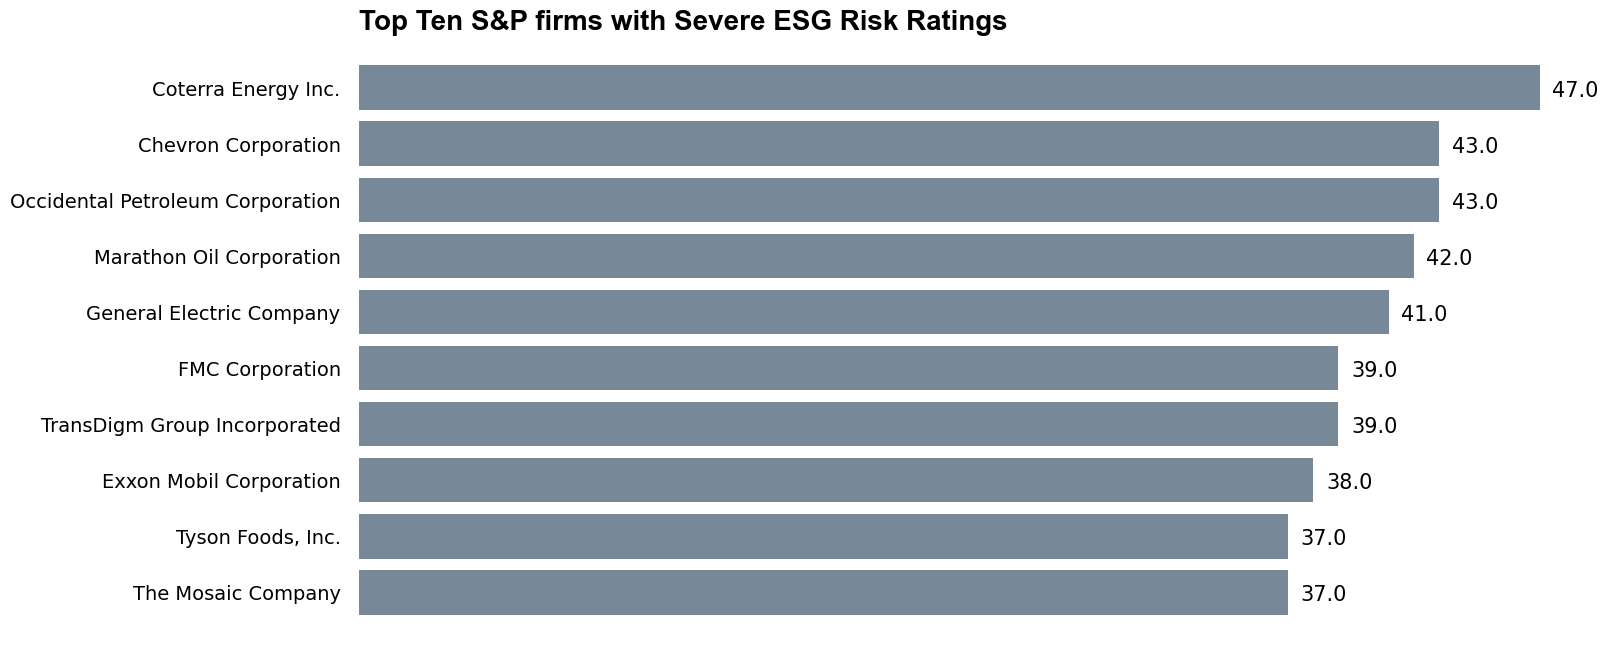

In [25]:
#Visualize firms with high ESG Risk ratings
data= SPEsg_Finclean[['Company_name','Total ESG Score']]
data_esg=data.sort_values('Total ESG Score', ascending=True).tail(10)

x = data_esg['Company_name'].tail(10) 
y = data_esg['Total ESG Score'].sort_values(axis=0, ascending=True).tail(10)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 8),dpi=100)
 
# Horizontal Bar Plot
ax.barh(x, y, color='lightslategrey')
#ax = data_esg.plot(kind='bar', color = 'maroon')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
 
# Add x, y gridlines
'''ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)'''
 
# Show top values
#ax.invert_yaxis()

# Add annotation to bars; Iterrating over the bars one-by-one        
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize = 15, #fontweight ='bold',
             color ='black')
ax.axes.get_xaxis().set_visible(False)
plt.tick_params(labelsize=14)

#ax.set_ylabel('Overall ESG Ratings',fontsize=15)
ax.set_title('Top Ten S&P firms with Severe ESG Risk Ratings',{'fontname':'Arial','fontsize': 20,
        'color': 'black','weight' : 'bold'}, loc ='left',)
 
        # Create annotation

'''# Add Text watermark
fig.text(0.9, 0.15, 'ESG Ratingd', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)'''

 
 
# Show Plot
plt.show()


In [26]:
# Get a column that categorizes ESG scores to ESG Risk ratings
SPEsg_Finclean["ESG Rating"]=SPEsg_Finclean["Total ESG Score"]

def data_to_ESG(data):

    if data <= 10:
        return "0-10"
    elif data >10 and data <= 20:
        return "10-20"
    elif data >20 and data <=30:
        return "20-30"
    elif data >30 and data <=40:
        return "30-40"
    else: # data >40:
        return "40+"

SPEsg_Finclean["ESG Rating"]= SPEsg_Finclean["ESG Rating"].apply(data_to_ESG)
    
SPEsg_Finclean
SPEsg_Finclean.to_csv('SPEsg_Finclean.csv', index=False)

<ipython-input-27-bfbaf68b0206>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(SPEsg_FinSec.index)


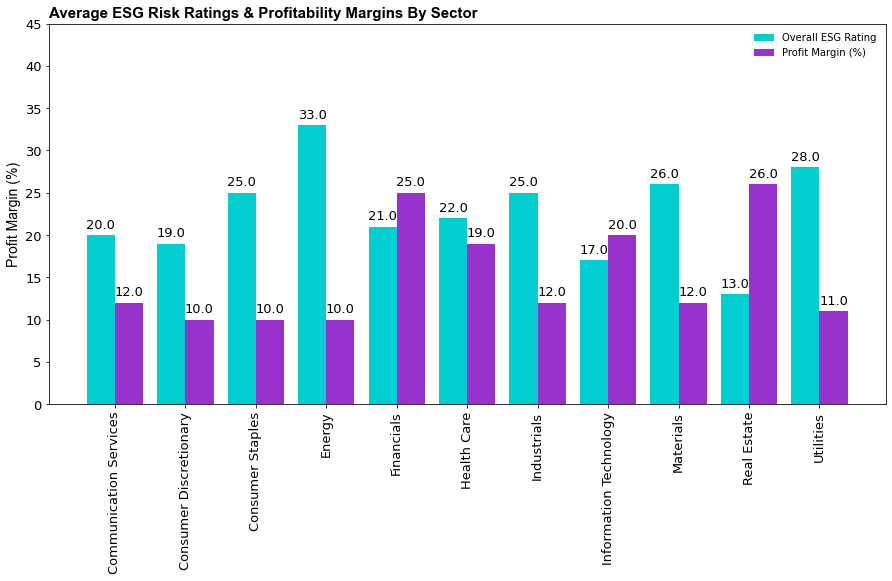

In [27]:
# Explore ESG ratings by sector by sector
SPEsg_FinSec=SPEsg_Finclean.groupby('Sector').mean()
SPEsg_FinSec

#Visualize ratings and profitability by sector
SPEsg_FinSec=SPEsg_FinSec.round(0)
width = 0.4
x = np.arange(len(SPEsg_FinSec.index))

fig, ax=plt.subplots(figsize=(15,7))

rects1=ax.bar(x-width/2, SPEsg_FinSec['Total ESG Score'],width, color = 'darkturquoise', label = 'Overall ESG Rating')
rects2= ax.bar(x+width/2,SPEsg_FinSec['Profit Margin(%)'],width, color = 'darkorchid', label ="Profit Margin (%)")

ax.set_title('Average ESG Risk Ratings & Profitability Margins By Sector ',{'fontname':'Arial','fontsize': 15,
        'color': 'black','weight' : 'bold'}, loc ='left')

ax.set_xticklabels(SPEsg_FinSec.index)
ax.set_xticks(x)
ax.set_ylim(0, 45)  # expand ylim to make labels easier to read
plt.xticks(rotation=90)
plt.tick_params(labelsize=13)
ax.set_ylabel(('Profit Margin (%)'),{'fontname':'Arial','fontsize': 14,
        'color': 'black'})


ax.legend(loc=1, bbox_to_anchor=(1., 1.0),frameon=False)
def add_value_labels(ax, spacing=4):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value), 
            fontsize=13,        # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)
plt.show()

### Step 2: <span style="color:green">Descriptive Statistics</span> 

In [28]:
SPEsg_Finclean.describe()

Total ESG Score  Environment      Social  Governance  \
count       443.000000   443.000000  443.000000  443.000000   
mean         21.625282     5.483070    9.293454    6.880361   
std           7.160695     5.338035    3.845974    2.311030   
min           7.000000     0.000000    1.000000    3.000000   
25%          16.000000     1.000000    7.000000    5.000000   
50%          21.000000     3.000000    9.000000    6.000000   
75%          26.000000     9.000000   12.000000    8.000000   
max          47.000000    25.000000   21.000000   16.000000   

       Controversy Score  Institutions_Share(%)  Profit Margin(%)  
count         443.000000             443.000000        443.000000  
mean            1.882619              83.388262         16.516930  
std             0.955925              12.583946         15.535875  
min             0.000000              32.000000        -25.000000  
25%             1.000000              76.000000          8.000000  
50%             2.000000              86.000000         14.000000  
75%             2.000000              93.000000         22.500000  
max             5.000000             112.000000        145.000000

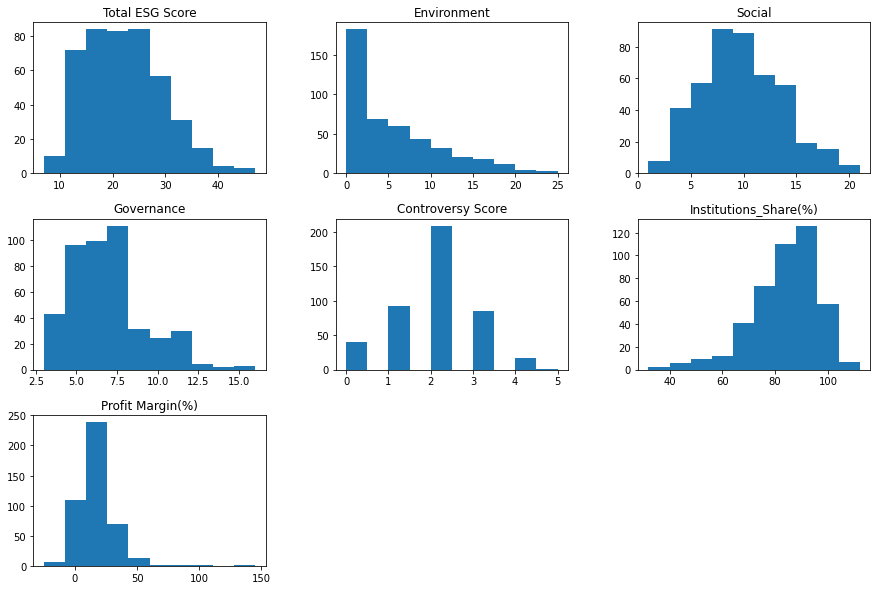

In [29]:
#Overview of numerical data distributions 
SPEsg_Finclean.hist(grid=False, figsize=(15, 10));
plt.show() 
#plt.savefig('Data/hist.jpg', quality=95, bbox_inches='tight')

<AxesSubplot:title={'center':'Raw Dataframe line Plot'}>

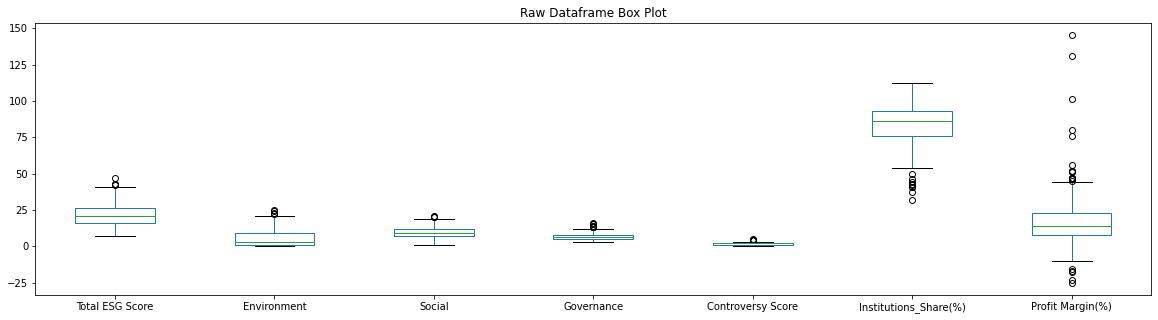

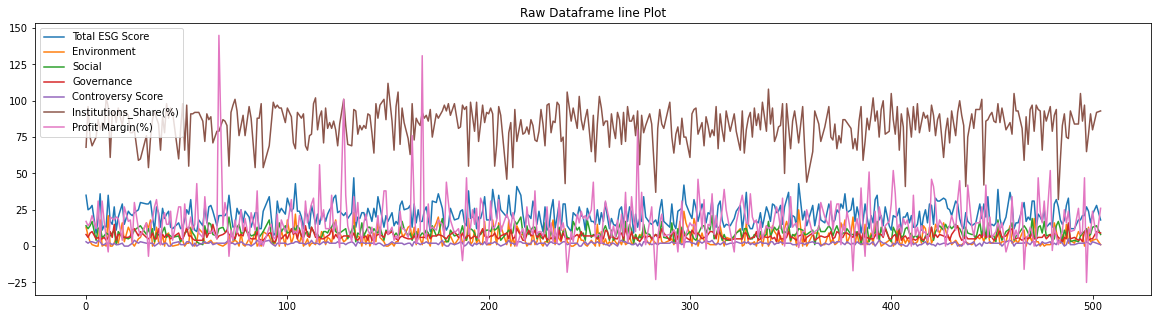

In [30]:
#visualize data with and without outliers
SPEsg_Finclean.plot(kind='box', title='Raw Dataframe Box Plot',figsize=(20,5))
SPEsg_Finclean.plot(kind='line', title='Raw Dataframe line Plot',figsize=(20,5))


In [31]:
#Compare total esg rating with profit margin by slicing the dataframe
#with the indexing syntax [:, start:stop:step] with start as the index of the first column to take, stop as the index of the last column to take, and step as the number of indices to advance after each extraction.
ESGscoretoprofit=SPEsg_Finclean.iloc[:, 6:-1:6]

ESGscoretoprofit


Total ESG Score  Profit Margin(%)
0               35.0              17.0
1               25.0              14.0
2               26.0              16.0
3               28.0              21.0
5                9.0              12.0
..               ...               ...
498             24.0              12.0
499             16.0               9.0
500             22.0              24.0
502             28.0               5.0
504             18.0              26.0

[443 rows x 2 columns]

<AxesSubplot:title={'center':'Raw Dataframe line Plot'}>

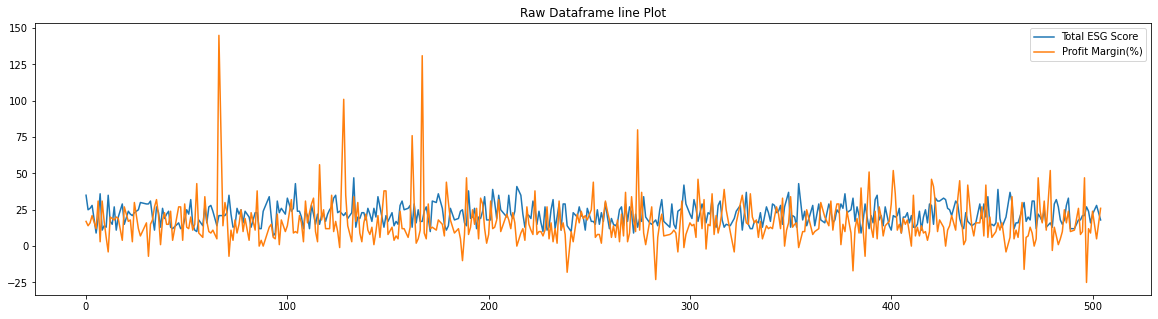

In [32]:
ESGscoretoprofit.plot(kind='line', title='Raw Dataframe line Plot',figsize=(20,5))



<AxesSubplot:title={'center':'Raw Dataframe line Plot'}>

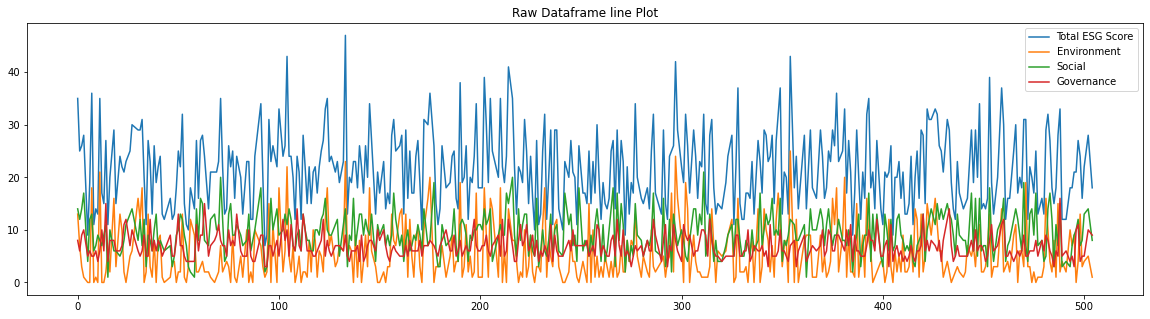

In [33]:
#compare all esg scores
esgscores=SPEsg_Finclean.iloc[:, 5:10]
esgscores
esgscores.plot(kind='line', title='Raw Dataframe line Plot',figsize=(20,5))

## Part 2: <span style="color:blue">Inferential Statistics</span>

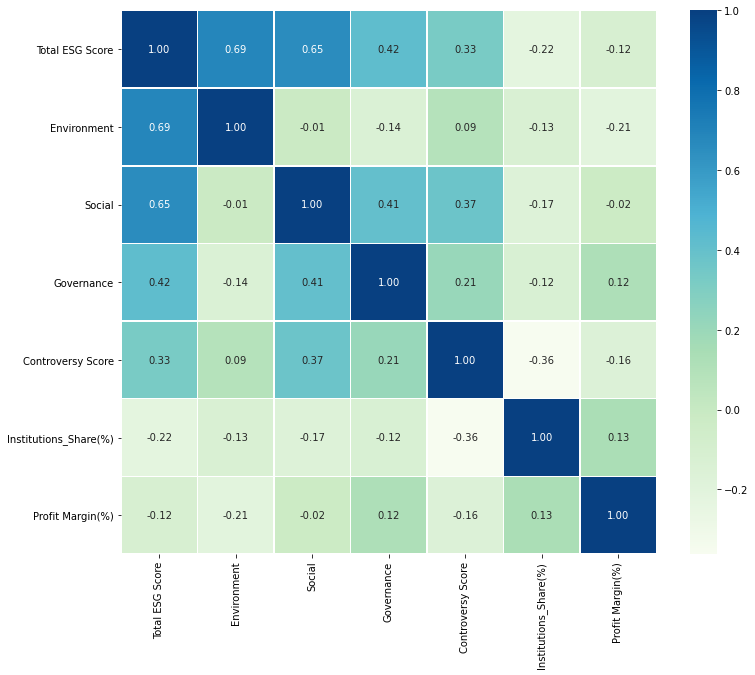

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(SPEsg_Finclean.corr(),linewidth=0.5, annot=True, fmt='.2f',cmap='GnBu');
plt.show()


**In general, no strong correlations were observed with individual ESG scores and financial metrics. 
Since, financial performance on a  general scale could barely be explained by individual company esg scores
Grouping by average esg risk levels or categories may provide better insight into the relationship between esg rating  and financial performance. Group esg ratings by esg risk rating category to identify if there is any relationship with financial performance.

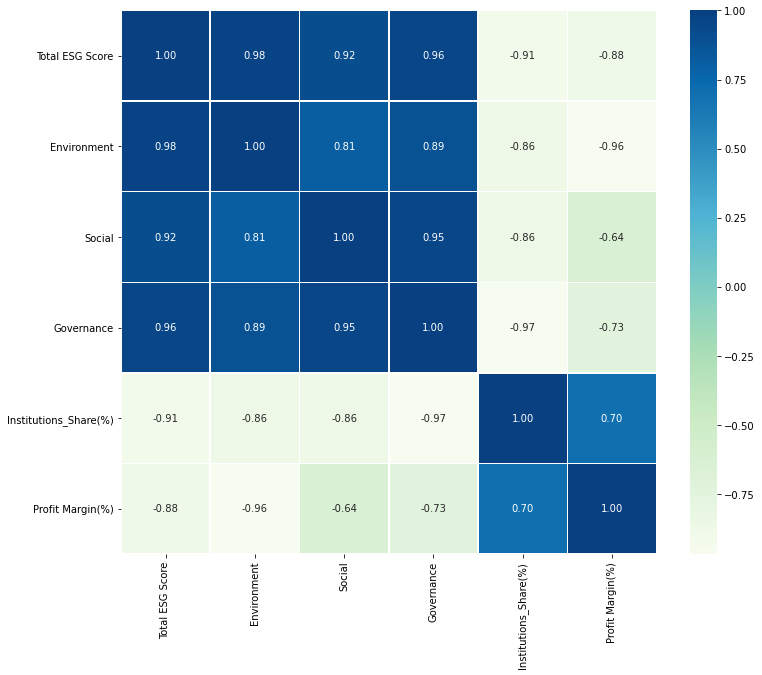

Total ESG Score  Environment     Social  Governance  \
ESG Rating                                                        
0-10               9.200000     1.000000   3.800000    4.300000   
10-20             15.778894     2.793970   7.035176    6.000000   
20-30             24.972376     6.187845  11.104972    7.696133   
30-40             33.583333    13.229167  12.645833    7.750000   
40+               43.200000    21.600000  12.400000    9.200000   

            Institutions_Share(%)  Profit Margin(%)  
ESG Rating                                           
0-10                    90.200000         16.200000  
10-20                   85.859296         17.442211  
20-30                   80.508287         16.823204  
30-40                   83.375000         12.437500  
40+                     75.800000          8.400000

In [35]:
#drop 'No of companies','Companies (%)' from maindataset and get means of variables by esg rating categories
#SPEsg_Finclean_no_outliers=SPEsg_Finclean_no_outliers.drop(['No of companies','Companies (%)'], axis=1)
esgfin=SPEsg_Finclean.groupby('ESG Rating').mean()
esgfin.reset_index()
esgfin = esgfin.drop(['Controversy Score'],axis=1)

esgfin_corr=esgfin.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(esgfin.corr(), linewidth = 0.5, annot=True, fmt='.2f',cmap='GnBu')

plt.show()
esgfin


In [36]:
#Count number of companies in each ESG risk level or category

Num_esg_ratings = SPEsg_Finclean.groupby('ESG Rating', sort=False) \
                .agg({'Total ESG Score':np.sum,'ESG Rating':'size'}) \
                .rename(columns={'ESG Rating':'No of companies'}) \
                .reset_index() \
                .reindex(SPEsg_Finclean.columns.tolist() + ['No of companies'], axis=1) 



Num_esg_ratings = Num_esg_ratings.drop(['Ticker', 'Securities', 'Company_name', 'Sector', 'Industry',
       'Headquarter', 'Environment', 'Social', 'Governance','Total ESG Score',
       'Controversy Score', 'Institutions_Share(%)', 'Profit Margin(%)',
        ],axis=1)

Num_esg_ratings

ESG Rating  No of companies
0      30-40               48
1      20-30              181
2       0-10               10
3      10-20              199
4        40+                5

In [37]:
#merge table with number of companies in each ESG risk level or category

esgfin = pd.merge(esgfin,Num_esg_ratings[['ESG Rating','No of companies']],on='ESG Rating', how='left')
esgfin =esgfin.round(1)
esgfin

ESG Rating  Total ESG Score  Environment  Social  Governance  \
0       0-10              9.2          1.0     3.8         4.3   
1      10-20             15.8          2.8     7.0         6.0   
2      20-30             25.0          6.2    11.1         7.7   
3      30-40             33.6         13.2    12.6         7.8   
4        40+             43.2         21.6    12.4         9.2   

   Institutions_Share(%)  Profit Margin(%)  No of companies  
0                   90.2              16.2               10  
1                   85.9              17.4              199  
2                   80.5              16.8              181  
3                   83.4              12.4               48  
4                   75.8               8.4                5

In [38]:
#Get the percentage of comapnies in eacg esg risk level or sector
esgfin['Companies (%)'] = (esgfin['No of companies'] / 
                  esgfin['No of companies'].sum())*100
esgfin=esgfin.round(0)
esgfin

ESG Rating  Total ESG Score  Environment  Social  Governance  \
0       0-10              9.0          1.0     4.0         4.0   
1      10-20             16.0          3.0     7.0         6.0   
2      20-30             25.0          6.0    11.0         8.0   
3      30-40             34.0         13.0    13.0         8.0   
4        40+             43.0         22.0    12.0         9.0   

   Institutions_Share(%)  Profit Margin(%)  No of companies  Companies (%)  
0                   90.0              16.0               10            2.0  
1                   86.0              17.0              199           45.0  
2                   80.0              17.0              181           41.0  
3                   83.0              12.0               48           11.0  
4                   76.0               8.0                5            1.0

In [39]:
# Get a column that categorizes ESG ratings explicitly and create a table with% companies, profitability and esg risk ratings

def ESG_Category(data):

    if '0-10' in data:
        return "Negigible"
    elif data == '10-20':
        return "Low"
    elif data == '20-30':
        return "Medium"
    elif data == '30-40':
        return "High"
    else: 
        return "Severe"   
    
esgfin["Esg Risk Category"]= esgfin["ESG Rating"].apply(ESG_Category)
esgfin.to_csv('perct_esgfin.csv', index=False)
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(columnorder = [1,2,3,4,5,6],
  columnwidth = [60,60,60,60,60,60],
  header=dict(
    values=['<b>ESG Rating</b>','<b>Esg Risk Category</b>','<b>Profit Margin(%)</b>','<b>No of companies</b>',
            '<b>Companies (%)</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='black', size=12)
  ),
  cells=dict(
     values=[esgfin["ESG Rating"], esgfin["Esg Risk Category"],esgfin['Profit Margin(%)'],
             esgfin['No of companies'], esgfin['Companies (%)']],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])
fig.update_layout(width=800, height=400)
fig.show()
esgfin

ESG Rating  Total ESG Score  Environment  Social  Governance  \
0       0-10              9.0          1.0     4.0         4.0   
1      10-20             16.0          3.0     7.0         6.0   
2      20-30             25.0          6.0    11.0         8.0   
3      30-40             34.0         13.0    13.0         8.0   
4        40+             43.0         22.0    12.0         9.0   

   Institutions_Share(%)  Profit Margin(%)  No of companies  Companies (%)  \
0                   90.0              16.0               10            2.0   
1                   86.0              17.0              199           45.0   
2                   80.0              17.0              181           41.0   
3                   83.0              12.0               48           11.0   
4                   76.0               8.0                5            1.0   

  Esg Risk Category  
0         Negigible  
1               Low  
2            Medium  
3              High  
4            Severe

In [40]:
# Create a table with profit margins, operating margins and esg risk levels


import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(columnorder = [1,2,3,4,5,6],
  columnwidth = [60,60,60,60,60,60],
  header=dict(
    values=['<b>ESG Rating</b>','<b>Esg Risk Category</b>','<b>Institutions Share(%)</b>','<b>Profit Margin(%)</b>',
            '<b>No of companies</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='black', size=13)
  ),
  cells=dict(
     values=[esgfin["ESG Rating"], esgfin["Esg Risk Category"],esgfin['Institutions_Share(%)'],
             esgfin['Profit Margin(%)'],esgfin['No of companies']],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'black', size = 13)
    ))
])
fig.update_layout(width=650, height=800)
fig.show()
fig.write_image("institutionshare%.png")

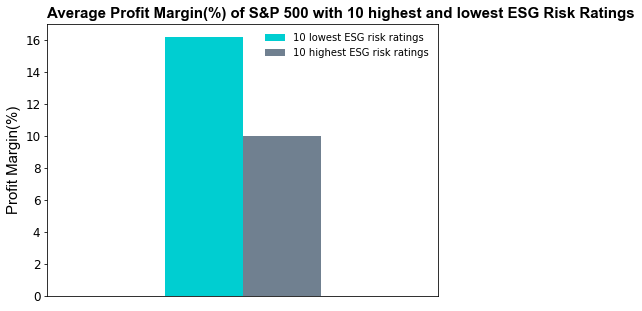

In [41]:
#Plot a graph of S&P500Companies profitbility margins for severe and negligible ratings.

highESG=SPEsg_Finclean.sort_values('Total ESG Score', ascending=False).head(10).mean()
lowESG=SPEsg_Finclean.sort_values('Total ESG Score', ascending=False).tail(10).mean()

fig, ax=plt.subplots(figsize=(7,5))
plt.tick_params(labelsize=12)
width = 0.4
x = np.arange(1)
ax.bar(x-width/2, lowESG['Profit Margin(%)'],width, color = 'darkturquoise', label = '10 lowest ESG risk ratings')
ax.set_title('Average Profit Margin(%) of S&P 500 with 10 highest and lowest ESG Risk Ratings',{'fontname':'Arial','fontsize': 15,
        'color': 'black','weight' : 'bold'}, loc ='left',)
ax.set_xlim(-1, 1) # expand xlim to make labels easier to read
ax.set_ylabel(('Profit Margin(%)'),{'fontname':'Arial','fontsize': 15,
       'color': 'black'})
ax.bar(x+width/2,highESG['Profit Margin(%)'],width, color = 'slategrey', label ="10 highest ESG risk ratings")
plt.xticks([]) #ax.xaxis.set_major_locator(ticker.NullLocator())
ax.legend(loc=1, bbox_to_anchor=(1, 1.0), frameon=False)
plt.show()



In [42]:
'''data=SPEsg_Finclean.sort_values(['Total ESG Score','Profit Margin(%)'],ascending=(True,False))
data.head(10)'''
esgfin

ESG Rating  Total ESG Score  Environment  Social  Governance  \
0       0-10              9.0          1.0     4.0         4.0   
1      10-20             16.0          3.0     7.0         6.0   
2      20-30             25.0          6.0    11.0         8.0   
3      30-40             34.0         13.0    13.0         8.0   
4        40+             43.0         22.0    12.0         9.0   

   Institutions_Share(%)  Profit Margin(%)  No of companies  Companies (%)  \
0                   90.0              16.0               10            2.0   
1                   86.0              17.0              199           45.0   
2                   80.0              17.0              181           41.0   
3                   83.0              12.0               48           11.0   
4                   76.0               8.0                5            1.0   

  Esg Risk Category  
0         Negigible  
1               Low  
2            Medium  
3              High  
4            Severe

<ipython-input-43-aa5e6c212425>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



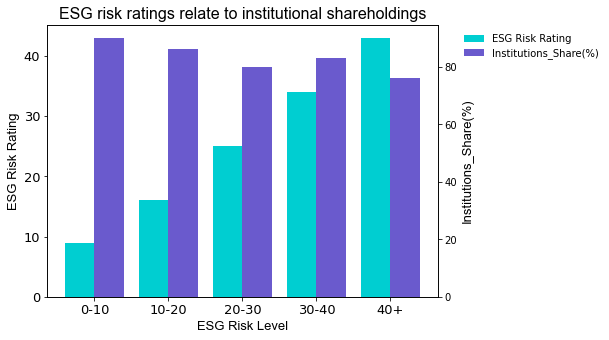

In [43]:
#ESG risk ratings relate to profitability margins, and institutional stock holdings based on correlation heat plot above
fig, ax = plt.subplots(figsize=(7,5))
plt.tick_params(labelsize=13)
width = 0.4
x = np.arange(len(esgfin["ESG Rating"]))
ax.bar(x-0.2, esgfin['Total ESG Score'],width, color = 'darkturquoise', label = 'ESG Risk Rating')
ax.set_title("ESG risk ratings relate to institutional shareholdings", 
             fontname='Arial',fontsize=16)
ax.set_xlabel(('ESG Risk Level'),{'fontname':'Arial','fontsize': 13,
        'color': 'black'})
ax.set_ylabel(('ESG Risk Rating'),{'fontname':'Arial','fontsize': 13,
        'color': 'black'})
ax.set_xticklabels(esgfin["ESG Rating"])
ax.set_xticks(x)
ax2=ax.twinx()

ax2.bar(x+0.2,esgfin['Institutions_Share(%)'],width, color = 'slateblue', label ="Institutions_Share(%)")
ax2.set_ylabel(("Institutions_Share(%)"),{'fontname':'Arial','fontsize': 13,
        'color': 'black'})
ax.legend(loc='upper right', bbox_to_anchor=(1.365, 1.0),frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1.435,0.95),frameon=False)
plt.show()

<ipython-input-44-b45bf0e0c464>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



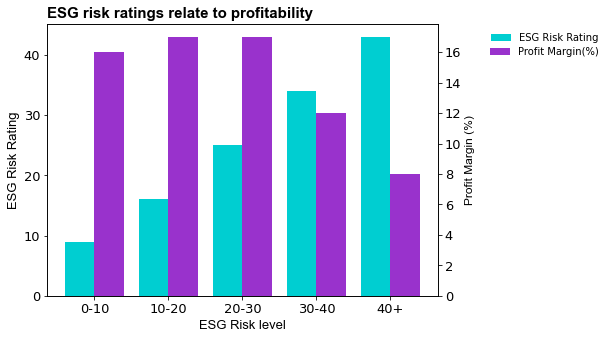

In [44]:
#ESG risk ratings relate to profitability margins,
fig, ax = plt.subplots( figsize=(7,5))
plt.tick_params(labelsize=13)
width = 0.4
x = np.arange(len(esgfin["ESG Rating"]))
ax.bar(x-0.2, esgfin['Total ESG Score'],width, color = 'darkturquoise', label = 'ESG Risk Rating')
ax.set_title('ESG risk ratings relate to profitability',{'fontname':'Arial','fontsize': 15,
        'color': 'black','weight' : 'bold'}, loc ='left',)
ax.set_xlabel(('ESG Risk level'),{'fontname':'Arial','fontsize': 13,
        'color': 'black'})
ax.set_ylabel(('ESG Risk Rating'),{'fontname':'Arial','fontsize': 13,
        'color': 'black'})
ax.set_xticklabels(esgfin["ESG Rating"])
ax.set_xticks(x)
ax1=ax.twinx()
ax1.bar(x+0.2,esgfin['Profit Margin(%)'],width, color = 'darkorchid', label ="Profit Margin(%)")
plt.tick_params(labelsize=13)
ax1.set_ylabel(('Profit Margin (%)'),{'fontname':'Arial','fontsize': 12,
        'color': 'black'})
ax.legend(loc=1, bbox_to_anchor=(1.435, 1),frameon=False)
ax1.legend(loc=1, bbox_to_anchor=(1.435, 0.95),frameon=False)


plt.show()

<ipython-input-45-fb18e2e5f0dd>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



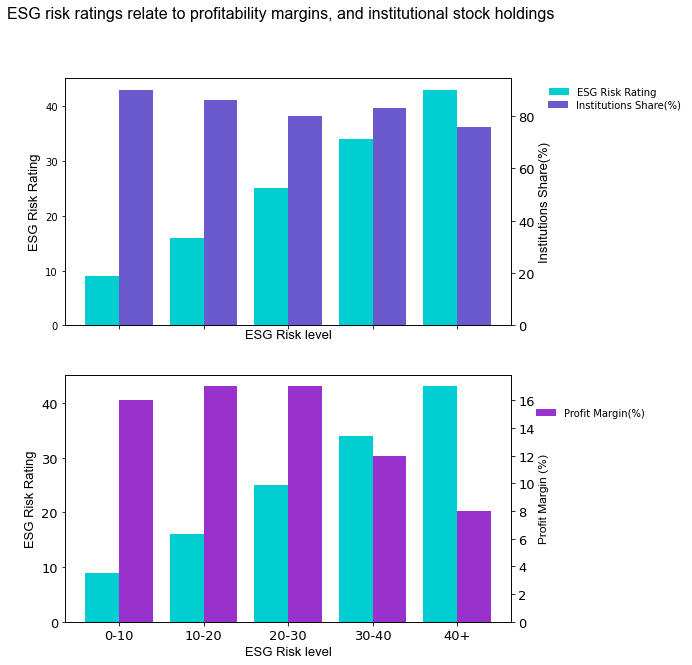

In [45]:
#Create a figure with two plots showing esg risk level vs instituition holdings.
fig, ax = plt.subplots(2, 1, figsize=(8,10),sharex=True)
plt.suptitle("ESG risk ratings relate to profitability margins, and institutional stock holdings", 
             fontname='Arial',fontsize=16)
plt.tick_params(labelsize=13)
width = 0.4
x = np.arange(len(esgfin["ESG Rating"]))
ax[0].bar(x-0.2, esgfin['Total ESG Score'],width, color = 'darkturquoise', label = 'ESG Risk Rating')
ax[0].set_xlabel(('ESG Risk level'),{'fontname':'Arial','fontsize': 13,
        'color': 'black'})
ax[0].set_ylabel(('ESG Risk Rating'),{'fontname':'Arial','fontsize': 13,
        'color': 'black'})
ax[0].set_xticklabels(esgfin["ESG Rating"])
ax[0].set_xticks(x)
ax2=ax[0].twinx()

ax2.bar(x+0.2,esgfin['Institutions_Share(%)'],width, color = 'slateblue', label ="Institutions Share(%)")
ax2.set_ylabel(('Institutions Share(%)'),{'fontname':'Arial','fontsize': 13,
        'color': 'black'})
ax[0].legend(loc='upper right', bbox_to_anchor=(1.346, 1.0),frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1.4,0.95),frameon=False)

#Second subplot
ax[1].bar(x-0.2, esgfin['Total ESG Score'],width, color = 'darkturquoise', label = None)
plt.tick_params(labelsize=13)
'''ax[1].set_title('Average ESG Risk Ratings & Profitability Margins By Controversy ',{'fontname':'Arial','fontsize': 15,
        'color': 'black','weight' : 'bold'}, loc ='left',)'''
ax[1].set_xlabel(('ESG Risk level'),{'fontname':'Arial','fontsize': 13,
        'color': 'black'})
ax[1].set_ylabel(('ESG Risk Rating'),{'fontname':'Arial','fontsize': 13,
        'color': 'black'})
ax[1].set_xticklabels(esgfin["ESG Rating"])
ax[1].set_xticks(x)
ax1=ax[1].twinx()
ax1.bar(x+0.2,esgfin['Profit Margin(%)'],width, color = 'darkorchid', label ="Profit Margin(%)")
plt.tick_params(labelsize=13)
ax1.set_ylabel(('Profit Margin (%)'),{'fontname':'Arial','fontsize': 12,
        'color': 'black'})
ax1.legend(loc=1, bbox_to_anchor=(1.32, 0.9),frameon=False)


plt.show()


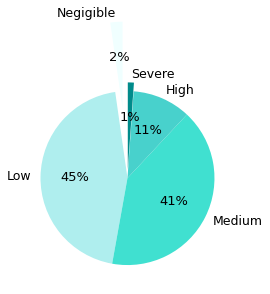

In [46]:
#create pie chart of % of companies with esg ratings

#define data
data = esgfin['No of companies']
labels = esgfin['Esg Risk Category']
explode = (0.8, 0, 0,0,0.1)
colors = ['azure','paleturquoise','turquoise','mediumturquoise','darkcyan']
fig, ax = plt.subplots()


patches, texts, autotexts  = ax.pie(data, explode=explode, labels = labels, colors = colors, labeldistance=1.1,
                                    autopct='%.0f%%', startangle=90, textprops={'size': 12.5})
plt.setp(autotexts, size=13)
[autotext.set_color('black') for autotext in autotexts]
[autotexts[0].set_color('black')]




plt.show()

ESG Rating  Total ESG Score  Environment  Social  Governance  \
0       0-10              9.0          1.0     4.0         4.0   
1      10-20             16.0          3.0     7.0         6.0   
2      20-30             25.0          6.0    11.0         8.0   
3      30-40             34.0         13.0    13.0         8.0   
4        40+             43.0         22.0    12.0         9.0   

   Institutions_Share(%)  Profit Margin(%)  No of companies  Companies (%)  \
0                   90.0              16.0               10            2.0   
1                   86.0              17.0              199           45.0   
2                   80.0              17.0              181           41.0   
3                   83.0              12.0               48           11.0   
4                   76.0               8.0                5            1.0   

  Esg Risk Category  
0         Negigible  
1               Low  
2            Medium  
3              High  
4            Severe

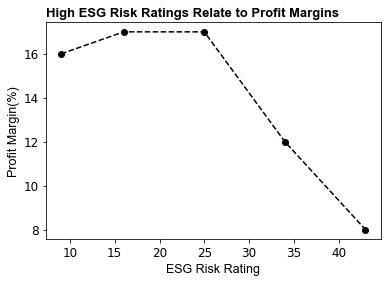

In [47]:
fig, ax=plt.subplots()


ax.set_title('High ESG Risk Ratings Relate to Profit Margins',{'fontname':'Arial','fontsize': 13,
        'color': 'black','weight' : 'bold'}, loc ='left',)
plt.tick_params(labelsize=12)


ax.plot(esgfin['Total ESG Score'],esgfin['Profit Margin(%)'],'ko--')

ax.set_xlabel(('ESG Risk Rating'),{'fontname':'Arial','fontsize': 12.5,
        'color': 'black'})
ax.set_ylabel(('Profit Margin(%)'),{'fontname':'Arial','fontsize': 12.5,
        'color': 'black'})
esgfin

8.645999959706105
[ 1.15910784e+00 -4.36595354e-02  3.78861857e-04]
0.9814867313326291


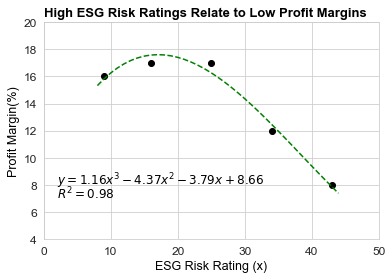

In [48]:
x=esgfin["Total ESG Score"]
y=esgfin["Profit Margin(%)"]
x=np.array(x).reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=3, include_bias=False)
X_poly=poly_features.fit_transform(x)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_
X_model=np.arange(8,45).reshape(-1,1)
X_poly_test=poly_features.fit_transform(X_model)
Y_poly_pred=lin_reg.predict(X_poly_test)
sns.set_style("whitegrid")
fig, ax=plt.subplots()

#ESG Risk Ratings Relate to Profit Margins
ax.set_title('High ESG Risk Ratings Relate to Low Profit Margins',{'fontname':'Arial','fontsize': 13,
        'color': 'black','weight' : 'bold'}, loc ='left',)
plt.tick_params(labelsize=12)
#plt.plot(x,y,'ko', X_model,Y_poly_pred,'g--')
ax.plot(x,y,'ko', X_model,Y_poly_pred,'g--')
ax.text(2, 8, r"$y=1.16x^3-4.37x^2-3.79x+8.66$",fontsize=12,color='black')#print equation
ax.text(2, 7, r"$R^2=0.98$",fontsize=12,color='black')#print equation
ax.set_xlim(0, 50) # expand xlim to make labels easier to read
ax.set_ylim(4,20)# expand ylim to make labels easier to read
ax.set_xlabel(('ESG Risk Rating (x)'),{'fontname':'Arial','fontsize': 12.5,
        'color': 'black'})
ax.set_ylabel(('Profit Margin(%)'),{'fontname':'Arial','fontsize': 12.5,
        'color': 'black'})
print(lin_reg.intercept_)#retrieve the intercept (8.645999959706105)
print(lin_reg.coef_)#retrieving the slope (coefficient of x):(1.15910784e+00 -4.36595354e-02  3.78861857e-04)
print(lin_reg.score(X_poly, y))#print rsquared (0.98)



plt.show()